In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nbaallelo.csv')
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [3]:
len(df)

126314

In [4]:
df.shape

(126314, 23)

In [5]:
pd.set_option('display.max.columns', None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [7]:
df.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [8]:
df['team_id'].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [9]:
df.loc[df['fran_id'] == 'Lakers', 'team_id'].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [10]:
df.loc[df['team_id'] == 'MNL', 'date_game'].min()

'1/1/1949'

In [11]:
df.loc[df['team_id'] == 'MNL', 'date_game'].agg(('min', 'max'))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

# Getting to Know Panda's Data Structures

In [12]:
revenues = pd.Series([5555, 70000, 1980])

In [13]:
revenues

0     5555
1    70000
2     1980
dtype: int64

In [14]:
df.index

RangeIndex(start=0, stop=126314, step=1)

In [15]:
revenues = pd.Series([5555, 7000, 1980])
revenues

0    5555
1    7000
2    1980
dtype: int64

In [16]:
city_rev = pd.Series(
    [4000, 8000, 6500],
    index=['Amsterdam', 'Toronto', 'Tokyo']
)
city_rev

Amsterdam    4000
Toronto      8000
Tokyo        6500
dtype: int64

In [17]:
city_emp = pd.Series({'Amsterdam' : 5, 'Tokyo' : 8})
city_emp

Amsterdam    5
Tokyo        8
dtype: int64

In [18]:
city_data = pd.DataFrame({
    'revenue' : city_rev,
    'employe_count' : city_emp
})
city_data

,revenue,employe_count
Amsterdam,4000,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [19]:
city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [20]:
city_data.values

array([[4.0e+03, 5.0e+00],
       [6.5e+03, 8.0e+00],
       [8.0e+03,     nan]])

In [21]:
df.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

# Using Loc and Iloc

In [22]:
colors = pd.Series(
    ['red', 'purple', 'blue', 'green', 'yellow'],
    index=[1,2,3,4,5])
colors

1       red
2    purple
3      blue
4     green
5    yellow
dtype: object

In [23]:
colors.loc[1]

'red'

In [24]:
colors.iloc[3]

'green'

In [25]:
# colors.iloc[1:3]
colors.loc[1:3]

1       red
2    purple
3      blue
dtype: object

In [26]:
colors.iloc[3:8]

4     green
5    yellow
dtype: object

In [27]:
df.loc[5555:5559]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
5555,2778,195312310FTW,NBA,0,1954,12/31/1953,30,0,FTW,Pistons,83,1565.7513,1572.4148,47.115856,PHW,Warriors,56,1421.2324,1414.5690,H,W,0.803381,at Indianapolis IN
5556,2779,195312310NYK,NBA,1,1954,12/31/1953,33,0,BOS,Celtics,95,1526.3329,1553.7504,45.189346,NYK,Knicks,74,1580.9148,1553.4973,A,W,0.291142,NaN
5557,2779,195312310NYK,NBA,0,1954,12/31/1953,30,0,NYK,Knicks,74,1580.9148,1553.4973,45.163074,BOS,Celtics,95,1526.3329,1553.7504,H,L,0.708858,NaN
5558,2780,195312310SYR,NBA,1,1954,12/31/1953,29,0,ROC,Kings,81,1591.5159,1586.8735,48.589958,SYR,Sixers,86,1593.8557,1598.4980,A,L,0.356838,NaN
5559,2780,195312310SYR,NBA,0,1954,12/31/1953,32,0,SYR,Sixers,86,1593.8557,1598.4980,49.760742,ROC,Kings,81,1591.5159,1586.8735,H,W,0.643162,NaN


# Query from Dataset

In [28]:
cur_dec = df[df['year_id'] > 2010]
cur_dec

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
113656,56829,201010260BOS,NBA,1,2011,10/26/2010,1,0,MIA,Heat,80,1547.3638,1543.1600,45.141479,BOS,Celtics,88,1625.0994,1629.3031,A,L,0.264418,NaN
113657,56829,201010260BOS,NBA,0,2011,10/26/2010,1,0,BOS,Celtics,88,1625.0994,1629.3031,53.754559,MIA,Heat,80,1547.3638,1543.1600,H,W,0.735582,NaN
113658,56830,201010260LAL,NBA,1,2011,10/26/2010,1,0,HOU,Rockets,110,1504.1956,1502.5969,40.900764,LAL,Lakers,112,1647.6016,1649.2002,A,L,0.197632,NaN
113659,56830,201010260LAL,NBA,0,2011,10/26/2010,1,0,LAL,Lakers,112,1647.6016,1649.2002,55.608730,HOU,Rockets,110,1504.1956,1502.5969,H,W,0.802368,NaN
113660,56831,201010260POR,NBA,1,2011,10/26/2010,1,0,PHO,Suns,92,1643.0225,1630.6204,53.879230,POR,Trailblazers,106,1552.8141,1565.2162,A,L,0.485912,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [29]:
game_wn = df[df["notes"].notnull()]
game_wn

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
930,466,194801300BLB,NBA,1,1948,1/30/1948,28,0,WSC,Capitols,71,1469.3469,1454.9012,47.065742,BLB,Baltimore,95,1434.0548,1448.5005,A,L,0.407940,at Baltimore's Fifth Regiment Armory
931,466,194801300BLB,NBA,0,1948,1/30/1948,31,0,BLB,Baltimore,95,1434.0548,1448.5005,46.407490,WSC,Capitols,71,1469.3469,1454.9012,H,W,0.592060,at Baltimore's Fifth Regiment Armory
1084,543,194803230CHS,NBA,1,1948,3/23/1948,49,1,WSC,Capitols,70,1465.9006,1461.1990,47.710297,CHS,Stags,74,1440.7186,1445.4203,A,L,0.393962,Tiebreaker
1085,543,194803230CHS,NBA,0,1948,3/23/1948,49,1,CHS,Stags,74,1440.7186,1445.4203,46.089687,WSC,Capitols,70,1465.9006,1461.1990,H,W,0.606038,Tiebreaker
1088,545,194803250CHS,NBA,1,1948,3/25/1948,49,1,BLB,Baltimore,75,1477.2552,1484.3137,50.044666,CHS,Stags,72,1445.4203,1438.3618,A,W,0.403142,Tiebreaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122207,61104,201401160ATL,NBA,0,2014,1/16/2014,39,0,ATL,Hawks,110,1505.0525,1487.5908,39.239410,BRK,Nets,127,1454.6501,1472.1118,N,L,0.572030,"at London, England"
123916,61959,201411120MIN,NBA,1,2015,11/12/2014,8,0,HOU,Rockets,113,1635.7723,1642.4540,54.894760,MIN,Timberwolves,101,1502.9229,1496.2412,N,W,0.682383,"at Mexico City Arena, Mexico City, Mexico"
123917,61959,201411120MIN,NBA,0,2015,11/12/2014,7,0,MIN,Timberwolves,101,1502.9229,1496.2412,40.129723,HOU,Rockets,113,1635.7723,1642.4540,N,L,0.317617,"at Mexico City Arena, Mexico City, Mexico"
124862,62432,201501150MIL,NBA,0,2015,1/15/2015,40,0,MIL,Bucks,95,1499.9038,1505.8629,41.138866,NYK,Knicks,79,1304.4620,1298.5029,N,W,0.754925,"at The O2, London, England"


In [30]:
df[
    (df["_iscopy"] == 0) &
    (df["pts"] > 100) &
    (df["opp_pts"] > 100) &
    (df["team_id"] == "BLB")
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.9351,1419.4280,38.557545,MNL,Lakers,115,1637.9852,1640.4923,H,L,0.338936,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.6687,1356.6470,25.797792,BOS,Celtics,105,1591.1434,1563.1652,H,W,0.281855,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.8323,1346.3594,24.876236,MNL,Lakers,112,1665.4396,1668.9125,H,L,0.224238,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.5239,1282.2396,19.579676,NYK,Knicks,113,1649.1516,1651.4359,H,L,0.178973,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.7493,1301.9685,20.736986,BOS,Celtics,111,1591.4943,1593.2749,H,L,0.253365,at Worcester MA


In [31]:
df[
    (df["_iscopy"] == 0) &
    (df["team_id"].str.startswith("LA")) &
    (df["year_id"] == 1992) &
    (df["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.9009,1556.0005,47.888252,UTA,Jazz,107,1647.5092,1638.4095,H,W,0.499125,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.6460,1474.3994,39.395412,POR,Trailblazers,102,1655.1210,1670.3677,H,L,0.406874,"at Las Vegas, NV"


# Grouping and Aggregating Your Data

In [32]:
points = df["pts"]
points.sum()

12976235

In [33]:
df.groupby("fran_id", sort = False)["pts"].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [34]:
df[
	(df["fran_id"] == "Spurs") &
	(df["year_id"] > 2010)
].groupby(["year_id", "game_result"])["game_id"].count()



year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

In [35]:
df[
	(df["fran_id"] == "Spurs") &
	(df["year_id"] > 2010)
].groupby(["game_result"])["game_id"].count()

game_result
L    133
W    332
Name: game_id, dtype: int64

In [36]:
df[
	(df["fran_id"] == "Warriors") &
	(df["year_id"] == 2015)
].groupby(["is_playoffs", "game_result"])["game_id"].count()



is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

In [37]:
df[
	(df["fran_id"] == "Warriors") &
	(df["year_id"] == 2015)
].groupby(["game_result", "is_playoffs"])["game_id"].count()



game_result  is_playoffs
L            0              15
             1               5
W            0              67
             1              16
Name: game_id, dtype: int64

In [38]:
nba = df.copy()
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [39]:
nba['difference'] = nba.pts - nba.opp_pts
# nba['difference'] =  nba.["pts"] - nba["opp_pts"]
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN,-2
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN,2
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN,16
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN,-16
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.4149,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.9791,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN,13
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.3949,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.7391,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN,-8


In [40]:
nba[['pts', 'opp_pts', 'difference']]

,pts,opp_pts,difference
0,66,68,-2
1,68,66,2
2,63,47,16
3,47,63,-16
4,33,50,-17
...,...,...,...
126309,82,103,-21
126310,104,91,13
126311,91,104,-13
126312,97,105,-8


In [41]:
nba["difference"].max()

68

In [42]:
nba["difference"].value_counts()

-2     4115
 2     4115
-5     4001
 5     4001
-7     3912
       ... 
 63       1
 68       1
-68       1
-65       1
 65       1
Name: difference, Length: 126, dtype: int64

In [43]:
renamed_nba = nba.rename(
    columns={"game_result":"result", "game_location":"location"}
)
renamed_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gameorder    126314 non-null  int64  
 1   game_id      126314 non-null  object 
 2   lg_id        126314 non-null  object 
 3   _iscopy      126314 non-null  int64  
 4   year_id      126314 non-null  int64  
 5   date_game    126314 non-null  object 
 6   seasongame   126314 non-null  int64  
 7   is_playoffs  126314 non-null  int64  
 8   team_id      126314 non-null  object 
 9   fran_id      126314 non-null  object 
 10  pts          126314 non-null  int64  
 11  elo_i        126314 non-null  float64
 12  elo_n        126314 non-null  float64
 13  win_equiv    126314 non-null  float64
 14  opp_id       126314 non-null  object 
 15  opp_fran     126314 non-null  object 
 16  opp_pts      126314 non-null  int64  
 17  opp_elo_i    126314 non-null  float64
 18  opp_elo_n    126314 non-

In [44]:
renamed_nba[['result', 'location']]

,result,location
0,L,H
1,W,A
2,W,H
3,L,A
4,L,H
...,...,...
126309,L,H
126310,W,H
126311,L,A
126312,L,H


In [45]:
# (!) karena ini perintah untuk delete column, jadi ketika sudah >1x di run akan muncul error kolom tidak ditemukan, that’s okay
 
# nba.drop('elo_i', axis=1)
nba.drop('elo_i', axis=1, inplace=True)

In [47]:
nba


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN,-2
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN,2
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN,16
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN,-16
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1704.3949,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1813.6349,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN,13
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1700.7391,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1692.0859,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN,-8


In [48]:
elo_columns = ["elo_n", "opp_elo_i", "opp_elo_n"]
nba.drop(elo_columns, inplace=True, axis=1)

In [50]:
nba["date_game"] = pd.to_datetime(nba["date_game"])

In [51]:
nba["date_game"].dtype

dtype('<M8[ns]')

In [52]:
nba["game_location"].unique()


array(['H', 'A', 'N'], dtype=object)

In [53]:
nba["game_location"].nunique()

3

In [54]:
nba["game_location"] = pd.Categorical(nba["game_location"])
nba["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

In [55]:
# NaN ← object NumPy, nan
# None ← object Python, None
# kedua ini merupakan missing values yang dikenali Pandas


In [56]:
rows_without_missing_data = nba.dropna() #axis = 0 -- baris
# rows_without_missing_data
rows_without_missing_data.shape

(5424, 20)

In [57]:
data_without_missing_columns = nba.dropna(axis=1) # -- kolom
# data_without_missing_columns
data_without_missing_columns.shape


(126314, 19)

In [59]:
data_with_default_notes = df.copy()
data_with_default_notes.shape

(126314, 23)

In [60]:
data_with_default_notes["notes"].fillna(
    value="no notes at all",
    inplace=True
)


In [61]:
data_with_default_notes['notes']


0         no notes at all
1         no notes at all
2         no notes at all
3         no notes at all
4         no notes at all
               ...       
126309    no notes at all
126310    no notes at all
126311    no notes at all
126312    no notes at all
126313    no notes at all
Name: notes, Length: 126314, dtype: object

In [62]:
df.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [63]:
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')]


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference


In [64]:
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty

True

In [65]:
further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count": [2, 2]},
    index=["New York", "Barcelona"]
)
further_city_data


,revenue,employee_count
New York,7000,2
Barcelona,3400,2


In [66]:
all_city_data = pd.concat([city_data, further_city_data], sort=False) #axis = 0
all_city_data


,revenue,employe_count,employee_count
Amsterdam,4000,5.0,NaN
Tokyo,6500,8.0,NaN
Toronto,8000,NaN,NaN
New York,7000,NaN,2.0
Barcelona,3400,NaN,2.0


In [67]:
city_countries = pd.DataFrame(
    {"country": ["Holland", "Japan", "Holland", "Canada", "Spain"], "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)
city_countries


,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [68]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)
cities


,revenue,employe_count,employee_count,country,capital
Amsterdam,4000.0,5.0,NaN,Holland,1.0
Tokyo,6500.0,8.0,NaN,Japan,1.0
Toronto,8000.0,NaN,NaN,Canada,0.0
New York,7000.0,NaN,2.0,NaN,NaN
Barcelona,3400.0,NaN,2.0,Spain,0.0
Rotterdam,NaN,NaN,NaN,Holland,0.0


In [69]:
pd.concat([all_city_data, city_countries], axis=1, join="inner")

,revenue,employe_count,employee_count,country,capital
Amsterdam,4000,5.0,NaN,Holland,1
Tokyo,6500,8.0,NaN,Japan,1
Toronto,8000,NaN,NaN,Canada,0
Barcelona,3400,NaN,2.0,Spain,0


In [70]:
countries = pd.DataFrame(
    {
        "population_millions": [17, 127, 37],
        "continent": ["Europe", "Asia", "North America"]
    },
    index=["Holland", "Japan", "Canada"]
)
countries


,population_millions,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North America


In [71]:
cities


,revenue,employe_count,employee_count,country,capital
Amsterdam,4000.0,5.0,NaN,Holland,1.0
Tokyo,6500.0,8.0,NaN,Japan,1.0
Toronto,8000.0,NaN,NaN,Canada,0.0
New York,7000.0,NaN,2.0,NaN,NaN
Barcelona,3400.0,NaN,2.0,Spain,0.0
Rotterdam,NaN,NaN,NaN,Holland,0.0


In [72]:
pd.merge(cities, countries, left_on="country", right_index=True)

,revenue,employe_count,employee_count,country,capital,population_millions,continent
Amsterdam,4000.0,5.0,NaN,Holland,1.0,17,Europe
Rotterdam,NaN,NaN,NaN,Holland,0.0,17,Europe
Tokyo,6500.0,8.0,NaN,Japan,1.0,127,Asia
Toronto,8000.0,NaN,NaN,Canada,0.0,37,North America


In [73]:
%matplotlib inline


In [74]:
nba


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,difference
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,66,40.294830,NYK,Knicks,68,H,L,0.640065,NaN,-2
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,68,41.705170,TRH,Huskies,66,A,W,0.359935,NaN,2
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,63,42.012257,NYK,Knicks,47,H,W,0.631101,NaN,16
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,47,40.692783,CHS,Stags,63,A,L,0.368899,NaN,-16
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,33,38.864048,WSC,Capitols,50,H,L,0.640065,NaN,-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,2015-06-11,100,1,CLE,Cavaliers,82,60.309792,GSW,Warriors,103,H,L,0.546572,NaN,-21
126310,63156,201506140GSW,NBA,0,2015,2015-06-14,102,1,GSW,Warriors,104,68.013329,CLE,Cavaliers,91,H,W,0.765565,NaN,13
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,91,60.010067,GSW,Warriors,104,A,L,0.234435,NaN,-13
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,97,59.290245,GSW,Warriors,105,H,L,0.481450,NaN,-8


C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002282008ABE0> has a label of '_iscopy' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot:xlabel='year_id'>

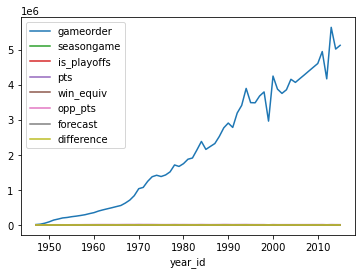

In [75]:
nba[ nba["fran_id"] == "Knicks"].groupby("year_id").sum().plot()

In [76]:
nba[ nba["fran_id"] == "Knicks"].groupby("year_id").sum()

,gameorder,_iscopy,seasongame,is_playoffs,pts,win_equiv,opp_pts,forecast,difference
year_id,,,,,,,,,
1947,11866,33,2145,5,4234,2730.265028,4218,32.795191,16
1948,22863,26,1326,3,3815,2218.581962,3665,27.041978,150
1949,50497,32,2211,6,5253,2864.656232,5163,34.976810,90
1950,90369,39,2701,5,5924,3496.024098,5772,40.455596,152
1951,140228,45,3240,14,6814,3518.238440,6809,40.118244,5
...,...,...,...,...,...,...,...,...,...
2011,4942956,43,3741,4,9097,3335.227006,9067,40.182653,30
2012,4165475,36,2556,5,6872,2923.475945,6731,35.427731,141
2013,5633393,46,4465,12,9259,4703.103214,8880,57.577030,379


<AxesSubplot:>

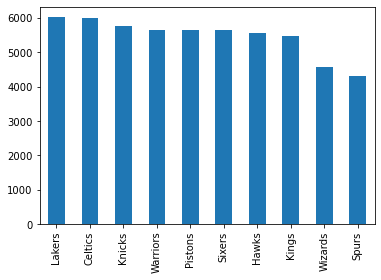

In [77]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

In [78]:
nba["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     